In [1]:
import numpy as np
from pyprojroot.here import here
import pandas as pd
from pyarrow import feather
import janitor
from janitor import clean_names

groups = {
  "populacao": ["densidade_populacional", "populacao_residente"],
  "setor": [["setor_primario", "setor_secundario", "setor_terciario"], ["perc_prim", "perc_sec"]],
  "causas": ["classe_da_causa_6", "causa_do_incidente", "classe_da_causa_4"],
  "direcao do vento" : [["dd_med", "dd_ffx"], ["dd_med_sin", "dd_med_cos", "dd_ffx_sin", "dd_ffx_cos"]],

  # TODO falta aquilo da altitude e tal
}
variables_to_not_use = ["codigo_do_relatorio", "distrito", "perc_terc"]


# import data/EventosSemAltitudeETal.feather
df = feather.read_feather(here("data/EventosSemAltitudeETal.feather"))
df = clean_names(df)
df

,codigo_do_relatorio,concelho,data_do_incidente,nivel_de_tensao,causa_do_incidente,duracao_incidente_min_,n_º_clientes_afetados,tiepi_mt_min_,saifi_mt_#_,saidi_mt_min_,...,sen_mes,cos_mes,t_med,t_max,t_min,dd_med,dd_ffx,ff_med,ff_max,pr_qtd
0,EDPD_2018_JAN_T_1,ALMADA,2018-01-02,MT,Escavações,55,828,0.002935,0.000044,0.002456,...,0.207912,0.978148,10.70,17.40,2.600,278.25,289.50,2.0,7.800,0.000000
1,EDPD_2018_JAN_T_2,SERTA,2018-01-02,MT,Abate De Árvores,163,549,0.002933,0.000177,0.016501,...,0.207912,0.978148,10.60,13.80,6.200,249.00,270.00,2.8,8.100,0.000000
2,EDPD_2018_JAN_T_3,FELGUEIRAS,2018-01-04,MT,Deslizamento De Terras,596,3459,0.019228,0.000266,0.035905,...,0.207912,0.978148,14.00,14.80,12.900,197.00,180.00,3.9,14.400,4.000000
3,EDPD_2018_JAN_T_4,TORRES-VEDRAS,2018-01-05,BT,Veículos,178,102,0.000000,0.000000,0.000000,...,0.207912,0.978148,12.40,15.10,9.100,288.00,225.00,3.6,13.900,13.200000
4,EDPD_2018_JAN_T_5,NISA,2018-01-09,MT,Aves,119,1731,0.004422,0.000155,0.010038,...,0.207912,0.978148,4.90,7.80,2.200,137.00,118.00,4.1,15.400,15.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,EDPD_2020_DEZ_T_21,POMBAL,2020-12-24,MT,Abate De Árvores,139,2517,0.005941,0.000461,0.017245,...,0.587785,-0.809017,7.90,12.20,2.100,7.00,351.00,1.7,7.600,0.000000
2918,EDPD_2020_DEZ_T_22,VILA-NOVA-DE-GAIA,2020-12-30,MT,Aves,81,3641,0.011914,0.000290,0.011131,...,0.587785,-0.809017,4.45,9.05,0.275,239.00,186.25,1.5,4.825,0.787500
2919,EDPD_2020_DEZ_T_23,ALBUFEIRA,2020-12-28,MT,Escavações,81,3175,0.005974,0.000086,0.005940,...,0.587785,-0.809017,13.20,15.30,7.700,285.00,293.00,5.8,14.100,0.100000
2920,EDPD_2020_DEZ_T_24,CASTRO-MARIM,2020-12-28,MT,Veículos,239,591,0.006928,0.000054,0.011528,...,0.587785,-0.809017,13.20,15.30,7.700,285.00,293.00,5.8,14.100,0.100000


In [2]:
from skimpy import skim
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types               Categories                                        │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━┓                                │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables ┃                                │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━┩                                │
│ │ Number of rows    │ 2922   │ │ float64     │ 29    │ │ concelho              │                                │
│ │ Number of columns │ 48     │ │ int32       │ 9     │ │ nivel_de_tensao       │                                │
│ └───────────────────┴────────┘ │ category    │ 6     │ │ causa_do_incidente    │                                │
│                                │ string      │ 3     │ │ decisao               │                                │
│                                │ datetime64  │ 1     │ │ classe_da_causa_4     │                                │
│                                └─────────────┴───────┘ │ classe_da_causa_6     │                                │
│                                                        └───────────────────────┘                                │
│                                                     number                                                      │
│ ┏━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_n ┃    ┃      ┃          ┃          ┃          ┃          ┃           ┃          ┃         ┃        ┃  │
│ ┃ ame      ┃ NA ┃ NA % ┃ mean     ┃ sd       ┃ p0       ┃ p25      ┃ p50       ┃ p75      ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ n_º_clie │  0 │    0 │     3336 │    36130 │        1 │      378 │      1503 │     2834 │ 1700000 │   ▇    │  │
│ │ ntes_afe │    │      │          │          │          │          │           │          │         │        │  │
│ │ tados    │    │      │          │          │          │          │           │          │         │        │  │
│ │ tiepi_mt │  0 │    0 │   0.0573 │    1.485 │        0 │ 0.002619 │  0.006724 │  0.01306 │   58.23 │   ▇    │  │
│ │ _min_    │    │      │          │          │          │          │           │          │         │        │  │
│ │ saifi_mt │  0 │    0 │ 0.001235 │  0.03076 │        0 │    6e-05 │   0.00017 │ 0.000323 │    1.49 │   ▇    │  │
│ │ _#_      │    │      │          │          │          │          │           │        8 │         │        │  │
│ │ saidi_mt │  0 │    0 │   0.0697 │    1.892 │        0 │ 0.003266 │   0.01156 │   0.0225 │    95.5 │   ▇    │  │
│ │ _min_    │    │      │          │          │          │          │           │          │         │        │  │
│ │ end_mwh_ │  0 │    0 │    1.017 │    4.301 │        0 │   0.1845 │    0.4726 │   0.9532 │   141.3 │   ▇    │  │
│ │ saifi_bt │  0 │    0 │ 0.000550 │  0.01051 │        0 │ 2.535e-0 │ 0.0001116 │ 0.000252 │   0.525 │   ▇    │  │
│ │ _#_      │    │      │        8 │          │          │        5 │           │        4 │         │        │  │
│ │ saidi_bt │  0 │    0 │  0.08129 │    2.156 │        0 │ 0.001945 │  0.006961 │  0.01558 │   85.74 │   ▇    │  │
│ │ _min_    │    │      │          │          │          │          │           │          │         │        │  │
│ │ densidad │  0 │    0 │    627.4 │     1399 │      4.8 │     35.5 │     108.4 │    398.9 │    7310 │   ▇    │  │
│ │ e_popula │    │      │          │          │          │          │           │          │         │        │  │
│ │ cional   │    │      │          │          │          │          │           │          │         │        │  │
│ │ populaca │  0 │    0 │    76680 │   114500 │     159

In [3]:
# use as test data 2023
test_data = df[df.data_do_incidente.dt.year == 2023]
train_data = df[df.data_do_incidente.dt.year != 2023]
test_data

,codigo_do_relatorio,concelho,data_do_incidente,nivel_de_tensao,causa_do_incidente,duracao_incidente_min_,n_º_clientes_afetados,tiepi_mt_min_,saifi_mt_#_,saidi_mt_min_,...,sen_mes,cos_mes,t_med,t_max,t_min,dd_med,dd_ffx,ff_med,ff_max,pr_qtd
1529,EREDES_2023_JAN_T_1,BARCELOS,2023-01-02,MT,Furtos,330,3676,0.053320,0.000480,0.077890,...,0.207912,0.978148,8.5,15.1,4.2,94.0,257.0,0.9,3.7,2.5
1530,EREDES_2023_JAN_TC_1,LOURINHA,2023-01-01,AT,Vento Intensidade Excepcional,780,77213,0.560000,0.014000,0.842000,...,0.207912,0.978148,15.6,18.5,11.4,223.0,180.0,5.3,15.9,11.7
1531,EREDES_2023_JAN_T_2,ODEMIRA,2023-01-07,MT,Aves,94,743,0.002510,0.000130,0.008360,...,0.207912,0.978148,13.2,17.7,9.9,201.0,221.0,5.1,10.6,1.7
1532,EREDES_2023_JAN_T_3,PORTO,2023-01-01,BT,Inundações Imprevisíveis,239,79,0.000000,0.000000,0.000000,...,0.207912,0.978148,13.6,17.4,10.0,218.0,178.0,5.4,19.8,49.5
1533,EREDES_2023_JAN_T_4,SANTIAGO-DO-CACEM,2023-01-01,MT,Aves,297,199,0.012420,0.000170,0.026260,...,0.207912,0.978148,15.3,18.6,10.2,207.0,192.0,2.0,12.0,16.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1938,EREDES_2023_DEZ_T_11,SANTIAGO-DO-CACEM,2023-12-27,MT,Veículos,208,2169,0.014931,0.000567,0.029906,...,0.587785,-0.809017,8.0,10.4,3.1,127.0,132.0,1.0,4.2,0.0
1939,EREDES_2023_DEZ_T_12,MORA,2023-12-28,BT,Furtos,722,13,0.001084,0.000010,0.007582,...,0.587785,-0.809017,7.8,13.9,4.3,80.0,121.0,1.6,4.2,0.0
1940,EREDES_2023_DEZ_T_13,FUNDAO,2023-12-27,MT,Aves,142,2348,0.006305,0.000661,0.015852,...,0.587785,-0.809017,2.7,3.8,1.7,78.0,104.0,1.8,6.6,0.1
1941,EREDES_2023_DEZ_T_14,LOURINHA,2023-12-30,MT,Abate De Árvores,322,2097,0.022287,0.000157,0.034820,...,0.587785,-0.809017,10.9,14.8,6.8,50.0,84.0,2.0,5.1,0.5


In [4]:
df.columns
# Index(['codigo_do_relatorio', 'concelho', 'data_do_incidente',
# 'nivel_de_tensao', 'causa_do_incidente', 'duracao_incidente_min_',
# 'n_º_clientes_afetados', 'tiepi_mt_min_', 'saifi_mt_#_',
# 'saidi_mt_min_', 'end_mwh_', 'saifi_bt_#_', 'saidi_bt_min_', 'decisao',
# 'distrito', 'densidade_populacional', 'populacao_residente',
# 'setor_primario', 'setor_secundario', 'setor_terciario',
# 'indice_de_envelhecimento', 'rural', 'count_zonaa', 'count_zonab',
# 'count_zonac', 'total_concelho_zonas', 'percentagem_zonaa',
# 'percentagem_zonab', 'percentagem_zonac', 'soma_degree_rede_concelho',
# 'n_subestacoes_concelho', 'classe_da_causa_4', 'classe_da_causa_6',
# 'perc_prim', 'perc_sec', 'perc_terc', 'sen_ano', 'cos_ano', 'sen_mes',
# 'cos_mes', 't_med', 't_max', 't_min', 'dd_med', 'dd_ffx', 'ff_med',
# 'ff_max', 'pr_qtd'],
# dtype='object')

Index(['codigo_do_relatorio', 'concelho', 'data_do_incidente',
       'nivel_de_tensao', 'causa_do_incidente', 'duracao_incidente_min_',
       'n_º_clientes_afetados', 'tiepi_mt_min_', 'saifi_mt_#_',
       'saidi_mt_min_', 'end_mwh_', 'saifi_bt_#_', 'saidi_bt_min_', 'decisao',
       'distrito', 'densidade_populacional', 'populacao_residente',
       'setor_primario', 'setor_secundario', 'setor_terciario',
       'indice_de_envelhecimento', 'rural', 'count_zonaa', 'count_zonab',
       'count_zonac', 'total_concelho_zonas', 'percentagem_zonaa',
       'percentagem_zonab', 'percentagem_zonac', 'soma_degree_rede_concelho',
       'n_subestacoes_concelho', 'classe_da_causa_4', 'classe_da_causa_6',
       'perc_prim', 'perc_sec', 'perc_terc', 'sen_ano', 'cos_ano', 'sen_mes',
       'cos_mes', 't_med', 't_max', 't_min', 'dd_med', 'dd_ffx', 'ff_med',
       'ff_max', 'pr_qtd'],
      dtype='object')

# Assumir independÊncia entre concelhos

In [5]:
# pegar lisboa so para exempleficar
lisboa = df[df.concelho == "LISBOA"]
# lisboa = lisboa.drop_constant_columns()
lisboa

,codigo_do_relatorio,concelho,data_do_incidente,nivel_de_tensao,causa_do_incidente,duracao_incidente_min_,n_º_clientes_afetados,tiepi_mt_min_,saifi_mt_#_,saidi_mt_min_,...,sen_mes,cos_mes,t_med,t_max,t_min,dd_med,dd_ffx,ff_med,ff_max,pr_qtd
45,EDPD_2018_FEV_T_18,LISBOA,2018-02-15,MT,Escavações,107,727,0.011604,0.000055,0.005689,...,0.406737,0.913545,13.4,16.5,11.0,225.0,180.0,2.7,6.8,0.0
156,EDPD_2018_ABR_T_30,LISBOA,2018-04-11,MT,Escavações,34,1321,0.001155,0.000022,0.000645,...,0.743145,0.669131,11.4,14.6,8.2,312.0,321.0,4.2,14.0,0.8
230,EDPD_2018_MAI_T_53,LISBOA,2018-05-26,MT,Escavações,45,609,0.001928,0.000088,0.002022,...,0.866025,0.500000,16.9,22.0,12.7,314.0,349.0,2.0,7.8,0.0
235,EDPD_2018_MAI_T_58,LISBOA,2018-05-28,MT,Escavações,39,987,0.006154,0.000110,0.002359,...,0.866025,0.500000,15.7,19.5,13.5,327.0,0.0,3.9,12.8,0.0
265,EDPD_2018_JUN_T_29,LISBOA,2018-06-21,MT,Escavações,28,737,0.001270,0.000033,0.000700,...,0.951057,0.309017,22.5,29.1,18.6,13.0,349.0,3.1,11.5,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2756,EDPD_2020_AGO_T_5,LISBOA,2020-08-03,MT,Escavações,67,336,0.010803,0.000107,0.002757,...,0.994522,-0.104528,21.2,27.9,17.4,360.0,354.0,5.0,15.9,0.0
2786,EDPD_2020_SET_T_5,LISBOA,2020-09-07,BT,Escavações,136,77,0.000000,0.000000,0.000000,...,0.951057,-0.309017,27.4,36.7,20.5,2.0,354.0,2.8,8.9,0.0
2828,EDPD_2020_SET_T_47,LISBOA,2020-09-22,MT,Escavações,65,571,0.009329,0.000107,0.004990,...,0.951057,-0.309017,20.8,25.5,18.7,247.0,264.0,3.0,10.0,0.1
2857,EDPD_2020_OUT_T_24,LISBOA,2020-10-28,MT,Escavações,74,2229,0.010993,0.000097,0.005738,...,0.866025,-0.500000,17.6,20.6,15.5,175.0,225.0,2.1,7.7,0.8


In [6]:
from eventdetector_ts import load_martian_bow_shock, FFN
from eventdetector_ts.metamodel.meta_model import MetaModel
from unidecode import unidecode
def transform_concelhos(x):
  return unidecode(x).upper().replace(' ', '-')
# transform to dataset, eventos
# first import data/dados_ipma/dados_ipma_imputado.feather
ipma = clean_names(feather.read_feather(here("data/dados_ipma/dados_ipma_imputado.feather")))
# filter > 2018
ipma = ipma[ipma.date > "2018-01-01"]
# filter to lisboa
ipma.rename(columns={"estacao": "distrito"}, inplace=True)
ipma.index = ipma.date
# add sin and pos column for year and month
ipma["sen_ano"] = np.sin(2*np.pi*ipma.index.year/12)
ipma["cos_ano"] = np.cos(2*np.pi*ipma.index.year/12)
ipma["sen_mes"] = np.sin(2*np.pi*ipma.index.month/12)
ipma["cos_mes"] = np.cos(2*np.pi*ipma.index.month/12)

ipma.drop(columns=["index", "ano", "mes", "dia", "date"], inplace=True)
ipma["distrito"] = ipma["distrito"].apply(transform_concelhos)
ipma_lisboa = ipma[ipma.distrito == "LISBOA"]
ipma_lisboa.drop(columns=["distrito"], inplace=True)
# add columns not related to the event
not_event_related = ["densidade_populacional", "populacao_residente", "setor_primario", "setor_secundario", "setor_terciario", "indice_de_envelhecimento", "rural", "count_zonaa", "count_zonab", "count_zonac", "total_concelho_zonas", "percentagem_zonaa", "percentagem_zonab", "percentagem_zonac", "soma_degree_rede_concelho", "n_subestacoes_concelho",  "perc_prim", "perc_sec", "perc_terc"]
for c in not_event_related:
  # join por ano
  ipma_lisboa[c] = 0.0
  for y in range(2018, 2023):
    # they don't change over time, only change evert year 
    ipma_lisboa.loc[ipma_lisboa.index.year == y, c] = lisboa.loc[lisboa.data_do_incidente.dt.year == y, c].values[0]

ipma_lisboa = ipma_lisboa.drop_constant_columns()
ipma_lisboa



<frozen importlib._bootstrap>:488: DeprecationWarning: Type google._upb._message.MessageMapContainer uses PyType_Spec with a metaclass that has custom tp_new. This is deprecated and will no longer be allowed in Python 3.14.
<frozen importlib._bootstrap>:488: DeprecationWarning: Type google._upb._message.ScalarMapContainer uses PyType_Spec with a metaclass that has custom tp_new. This is deprecated and will no longer be allowed in Python 3.14.
C:\Users\Plancha\AppData\Local\Temp\ipykernel_16984\1942032304.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipma_lisboa.drop(columns=["distrito"], inplace=True)
C:\Users\Plancha\AppData\Local\Temp\ipykernel_16984\1942032304.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

,t_med,t_max,t_min,dd_med,dd_ffx,ff_med,ff_max,pr_qtd,dd_med_sin,dd_med_cos,...,setor_terciario,indice_de_envelhecimento,count_zonaa,total_concelho_zonas,percentagem_zonaa,soma_degree_rede_concelho,n_subestacoes_concelho,perc_prim,perc_sec,perc_terc
date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,13.0,15.9,9.1,269.0,309.0,1.8,6.9,0.0,-0.923447,0.383726,...,217447.0,166.6,880.0,880.0,1.0,130.0,26.0,0.005131,0.089228,0.90564
2018-01-03,14.5,17.0,12.9,284.0,309.0,2.1,6.0,0.1,0.951064,0.308994,...,217447.0,166.6,880.0,880.0,1.0,130.0,26.0,0.005131,0.089228,0.90564
2018-01-04,14.3,16.3,13.3,251.0,264.0,2.8,7.9,0.8,-0.321594,0.946878,...,217447.0,166.6,880.0,880.0,1.0,130.0,26.0,0.005131,0.089228,0.90564
2018-01-05,12.4,15.1,9.1,288.0,225.0,3.6,13.9,13.2,-0.855504,0.517796,...,217447.0,166.6,880.0,880.0,1.0,130.0,26.0,0.005131,0.089228,0.90564
2018-01-06,8.7,12.4,6.3,352.0,6.0,3.1,15.3,0.5,0.141150,0.989988,...,217447.0,166.6,880.0,880.0,1.0,130.0,26.0,0.005131,0.089228,0.90564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,7.7,9.6,5.7,64.0,84.0,3.7,7.2,0.0,0.920026,0.391857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000
2023-12-28,9.8,12.7,7.4,60.0,51.0,2.9,6.3,0.0,-0.304811,-0.952413,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000
2023-12-29,10.0,12.0,8.7,57.0,45.0,2.7,6.1,0.0,0.436165,0.899867,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000


In [7]:
# remove from ipma_lisboa those
for c in not_event_related + ["sen_ano", "cos_ano", "sen_mes", "cos_mes", "t_med", "t_max", "t_min", "dd_med", "dd_ffx", "ff_med", "ff_max", "pr_qtd"]:
  try:
    lisboa = lisboa.drop(columns=[c])
  except KeyError:
    pass
lisboa = lisboa.drop_constant_columns()
lisboa

,codigo_do_relatorio,data_do_incidente,nivel_de_tensao,causa_do_incidente,duracao_incidente_min_,n_º_clientes_afetados,tiepi_mt_min_,saifi_mt_#_,saidi_mt_min_,end_mwh_,saifi_bt_#_,saidi_bt_min_,decisao,classe_da_causa_4,classe_da_causa_6
45,EDPD_2018_FEV_T_18,2018-02-15,MT,Escavações,107,727,0.011604,0.000055,0.005689,0.833274,0.000095,0.009749,Não Aprovado,Humanos - Acidentes,Obras
156,EDPD_2018_ABR_T_30,2018-04-11,MT,Escavações,34,1321,0.001155,0.000022,0.000645,0.065111,0.000024,0.000596,Não Aprovado,Humanos - Acidentes,Obras
230,EDPD_2018_MAI_T_53,2018-05-26,MT,Escavações,45,609,0.001928,0.000088,0.002022,0.123634,0.000006,0.000106,Não Aprovado,Humanos - Acidentes,Obras
235,EDPD_2018_MAI_T_58,2018-05-28,MT,Escavações,39,987,0.006154,0.000110,0.002359,0.394570,0.000161,0.002547,Não Aprovado,Humanos - Acidentes,Obras
265,EDPD_2018_JUN_T_29,2018-06-21,MT,Escavações,28,737,0.001270,0.000033,0.000700,0.086460,0.000117,0.002379,Não Aprovado,Humanos - Acidentes,Obras
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2756,EDPD_2020_AGO_T_5,2020-08-03,MT,Escavações,67,336,0.010803,0.000107,0.002757,0.732454,0.000053,0.001487,Não Aprovado,Humanos - Acidentes,Obras
2786,EDPD_2020_SET_T_5,2020-09-07,BT,Escavações,136,77,0.000000,0.000000,0.000000,0.001000,0.000012,0.001677,Não Aprovado,Humanos - Acidentes,Obras
2828,EDPD_2020_SET_T_47,2020-09-22,MT,Escavações,65,571,0.009329,0.000107,0.004990,0.650049,0.000089,0.004560,Não Aprovado,Humanos - Acidentes,Obras
2857,EDPD_2020_OUT_T_24,2020-10-28,MT,Escavações,74,2229,0.010993,0.000097,0.005738,0.715156,0.000329,0.021855,Não Aprovado,Humanos - Acidentes,Obras


2024-05-27 00:46:01 [INFO] eventdetector_ts.metamodel: checks if the index of the dataset is already in the datetime format.
2024-05-27 00:46:01 [INFO] eventdetector_ts.metamodel: Computing the time sampling and time unit of the dataset
2024-05-27 00:46:01 [WARNING] eventdetector_ts.metamodel: The time sampling t_s is 1 days
5
2024-05-27 00:46:01 [INFO] eventdetector_ts.metamodel: {   'batch_size': 32,
    'delta': 6,
    'dropout': 0.3,
    'epochs': 256,
    'epsilon': 0.0002,
    'fill_nan': 'zeros',
    'hyperparams_cnn': (16, 64, 3, 8, 1, 2, 'relu'),
    'hyperparams_ffn': (1, 3, 64, 256, 'sigmoid'),
    'hyperparams_mm_network': (1, 32, 'sigmoid'),
    'hyperparams_rnn': (1, 2, 16, 128, 'tanh'),
    'hyperparams_transformer': (256, 4, 1, True, 'relu'),
    'last_act_func': 'sigmoid',
    'models': [('FFN', 1)],
    'pa': 5,
    'remove_overlapping_events': True,
    's_h': 0.01,
    'save_models_as_dot_format': False,
    'scaler': 'StandardScaler',
    't_max': 9.0,
    't_r': 0

C:\Users\Plancha\Desktop\pfacd\.pixi\envs\default\Lib\site-packages\eventdetector_ts\data\helpers_data.py:198: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  df[MIDDLE_EVENT_LABEL] = df[MIDDLE_EVENT_LABEL].apply(lambda x: datetime.utcfromtimestamp(x))
C:\Users\Plancha\Desktop\pfacd\.pixi\envs\default\Lib\site-packages\eventdetector_ts\data\helpers_data.py:198: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  df[MIDDLE_EVENT_LABEL] = df[MIDDLE_EVENT_LABEL].apply(lambda x: datetime.utcfromtimestamp(x))
C:\Users\Plancha\Desktop\pfacd\.pixi\envs\default\Lib\site-packages\eventdetector_ts\data\helpers_data.py:198: Depreca

2024-05-27 00:46:01 [INFO] eventdetector_ts.metamodel: Split the data into training, validation, and test sets and apply the specified scaler to each time step...
2024-05-27 00:46:01 [INFO] eventdetector_ts.metamodel: Saves the scalers to disk...
Saving scaling...7/7
2024-05-27 00:46:01 [INFO] eventdetector_ts.metamodel: Fits the created models to the training data...
2024-05-27 00:46:01 [INFO] eventdetector_ts.models: Summary of FFN_0...


Model: "FFN_0"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 7, 30)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 210)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 111)            │        23,421 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 111)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 89)             │         9,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 89)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            90 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,479 (130.78 KB)

 Trainable params: 33,479 (130.78 KB)

 Non-trainable params: 0 (0.00 B)

2024-05-27 00:46:01 [INFO] eventdetector_ts.models: None
2024-05-27 00:46:01 [INFO] eventdetector_ts.models: Fitting of FFN_0...
Epoch 1/256
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0854 - val_loss: 0.0841
Epoch 2/256
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0820 - val_loss: 0.0894
Epoch 3/256
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0746 - val_loss: 0.0982
Epoch 4/256
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0665 - val_loss: 0.0832
Epoch 5/256
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0732 - val_loss: 0.0958
Epoch 6/256
 1/44 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0364Restoring model weights from the end of the best epoch: 4.
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0621 - val_loss: 0.0889
Epoch 6: early stopping. Restoring model weights from the end of the best epoch: 4. Best validation loss: 0.08323124796152115.
2024-05-27 00:46:03 [INFO] eventdetector_ts.models: Evaluating model FFN_0 on test data
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 539

C:\Users\Plancha\Desktop\pfacd\.pixi\envs\default\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\Plancha\Desktop\pfacd\.pixi\envs\default\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\Plancha\Desktop\pfacd\.pixi\envs\default\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


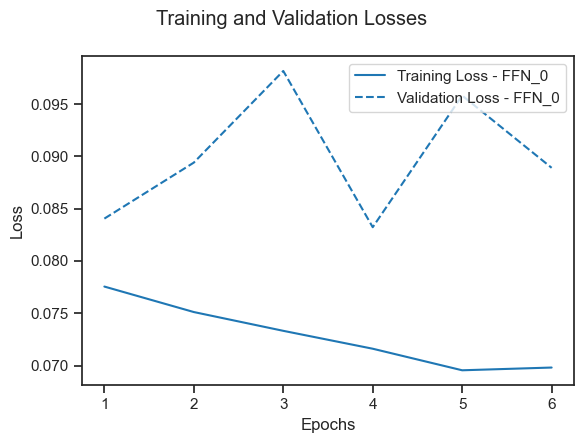

2024-05-27 00:46:07 [INFO] eventdetector_ts.plotter: Plotting and saving the figure displaying the true and the predicted op


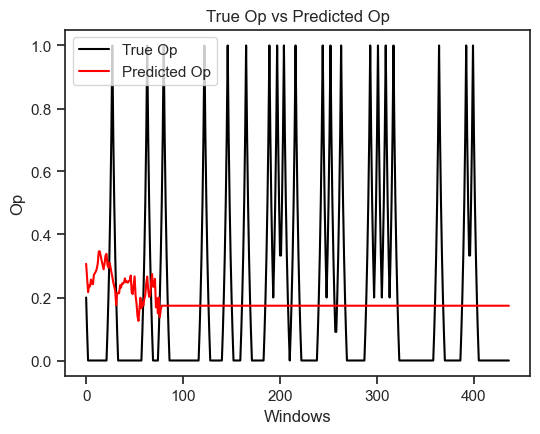

2024-05-27 00:46:07 [INFO] eventdetector_ts.plotter: Plotting and saving the figure displaying the true events and the predicted events


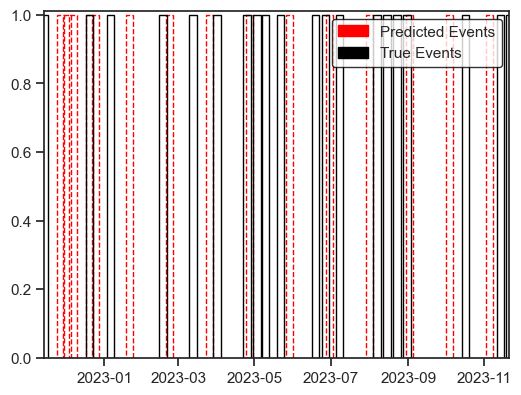

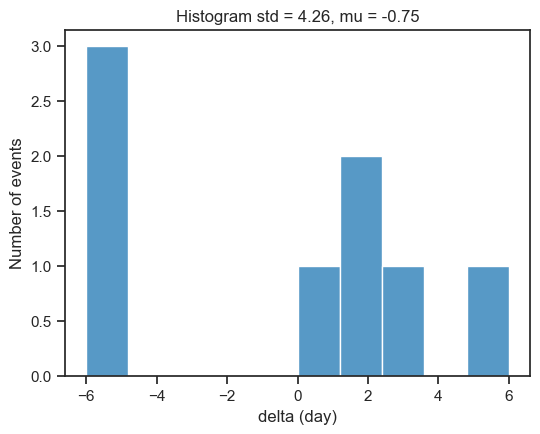

In [8]:
meta_model = MetaModel(
  output_dir=here("models").name,
  dataset=ipma_lisboa,
  events=list(lisboa["data_do_incidente"]),
  width=7, 
  batch_size=32,
  s_h=0.01,
  models=[(FFN, 1)]
)
meta_model.fit()

In [9]:
print("hello")

hello


In [10]:
here("models.keras").name

'models.keras'

In [11]:
from eventdetector_ts import load_credit_card_fraud, FFN
from eventdetector_ts.metamodel.meta_model import MetaModel

dataset, events = load_credit_card_fraud()
events

,events
0,1970-01-01 00:09:01
1,1970-01-01 00:10:23
2,1970-01-01 01:22:00
3,1970-01-01 01:41:48
4,1970-01-01 01:45:29
...,...
487,1970-01-04 05:44:23
488,1970-01-04 05:49:03
489,1970-01-04 05:49:09
490,1970-01-04 06:05:44
